In [24]:
# Load library
import os
import pickle

import matplotlib.pyplot as plt
# %matplotlib widget
%matplotlib inline

from scapy.all import *

import pandas as pd

In [3]:
# read pcap files
def read_pcap(root_dir, ext=('.pcap', '.pcapng')):
    queue = [root_dir]
    while len(queue) != 0:
        nest_dir = queue.pop()
        with os.scandir(nest_dir) as it:
            for entry in it:
                if not entry.name.startswith('.') and entry.is_file():
                    if entry.name.endswith(ext):
                        label = os.path.basename(os.path.dirname(entry.path)) # dirname is label
                        yield label, entry.path
                elif not entry.name.startswith('.') and entry.is_dir():
                    queue.append(entry.path)

In [5]:
SPLIT_DATA = './dataset/pcap_data_splited'

def pkt2img(label, cnt):
    def process_pkt(pkt):
        if not pkt.haslayer('IP'):
            return
        ip = pkt['IP']
        if not (ip.haslayer('TCP') or ip.haslayer('UDP')):
            return
        if ip.haslayer('TCP'):
            l4 = 'TCP'
        elif ip.haslayer('UDP'):
            l4 = 'UDP'
        if label not in cnt.keys():
            cnt[label] = dict()
        size = len(raw(ip[l4].payload))
        cnt[label][size] = cnt[label].get(size, 0) + 1
    return process_pkt

splited_path = os.path.abspath(os.path.expanduser(SPLIT_DATA))
cnt = dict()
for label, path in read_pcap(splited_path):
    print(f'Current processing: {label} {path}', end='\r')
    sniff(offline=path, prn=pkt2img(label, cnt), store=False)

cntl = dict()
for label, value in cnt.items():
    cntl[label] = pd.DataFrame(sorted(value.items()), columns=['size', 'count'])
    
with open('packetsize.pickle', 'wb') as f:
    pickle.dump(cntl, f)

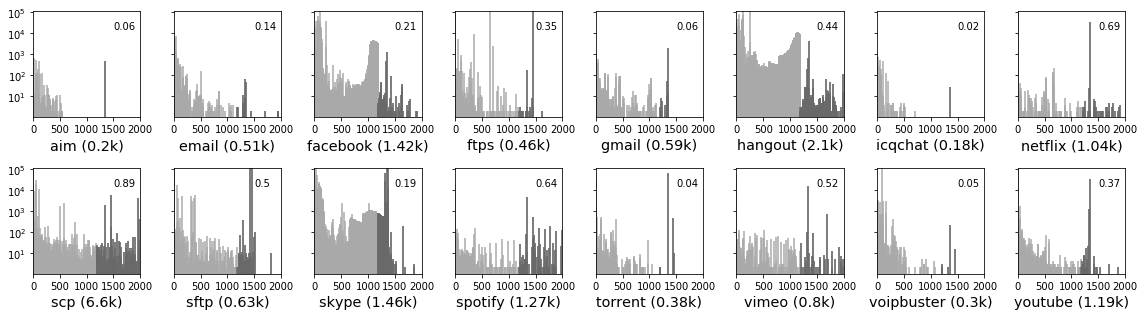

In [101]:
fig1 = plt.figure(figsize=(16, 4.5), tight_layout=True)

lkey = len(cntl.keys())
i = 0

for label in sorted(cntl.keys()):
    ax = fig1.add_subplot(2, lkey//2, i+1)
    ax.stem(cntl[label]['size'], cntl[label]['count'],
            markerfmt='None', linefmt='darkgray',
            use_line_collection=True)
    td = cntl[label][cntl[label]['size']>=1184]
    ax.stem(td['size'], td['count'],
            markerfmt='None', linefmt='dimgray',
            use_line_collection=True)
    orate = round(td.shape[0] / cntl[label].shape[0], 2)
    ax.text(1500, 10**4*1.5, orate, color='black')
    ax.set_yscale('log')
    ax.set_xlim([0, 2000])
    ax.set_xticks([0, 500, 1000, 1500, 2000])
    ax.set_ylim([1, 10**5*1.1])
    ax.set_yticks([10**x for x in range(1, 6)])
    ax.set_xlabel(f'{label} ({round(cntl[label].shape[0]/1000, 2)}k)', size='x-large')
    ax.margins(10, 1000)
    if i%(lkey//2) != 0:
        ax.set_yticklabels([])
    i = i + 1
# fig1.tight_layout()

# fig1 = plt.figure(figsize=(10, 10))
# for i in range(25):
#     ax = fig1.add_subplot(5, 5, i+1)
#     ax.set_xticks([])
#     ax.set_yticks([])
#     ax.grid(False)
#     ax.imshow(image_batch[i])
#     ax.set_xlabel(predicted_label_batch[i], color='brown')

In [88]:
d.shape[0] / cntl['vimeo'].shape[0]

0.5181023720349563

In [23]:
plt.close()

In [3]:
# Metadata analysis
## X-axis: 
## Y-axis: 
data = dict()
datat = dict()
pcap_path = os.path.abspath(os.path.expanduser('./data'))
for label, path in read_pcap(pcap_path):
    rp = rdpcap(path, count=1000)
    d = data.get(label, dict())
    for k, v in rp.sessions().items():
        if 'TCP' not in k: # filter only TCP packets
            continue
        cnt = len(v)
        d[cnt] = d.get(cnt, 0) + 1
        datat[cnt] = datat.get(cnt, 0) + 1
    data[label] = d

In [8]:
plt.close()
labels = list()
i = 0
for key in data.keys():
    labels.append(key)
    dptr = data[key]
    d = list(dptr.items())
    d.sort()
    x = list()
    y = list()
    t = sum([v for k, v in d if k != 1])
    s = 0
    for k, v in d:
        if k == 1:
            continue
        x.append(k)
        s = s + v
        y.append(s/t)
    fig = plt.plot(x, y, alpha=0.5, linestyle='solid' if i < 8 else 'dashed')
    i = i + 1
d2 = list(datat.items())
d2.sort()
x = list()
y = list()
t = sum([v for k, v in d2 if k != 1])
s = 0
for k, v in d2:
    if k == 1:
        continue
    x.append(k)
    s = s + v
    y.append(s/t)
plt.plot(x, y, color='black', linewidth=2)

plt.vlines(5, 0, y[x.index(5)], color='brown', linestyles='dotted', alpha=0.8)
plt.hlines(y[x.index(5)], 0, 5, color='brown', linestyles='dotted', alpha=0.8)
plt.text(5, 0, round(5,2), fontsize=8)
plt.text(1, y[x.index(5)], round(y[x.index(5)],2), fontsize=8)

for i in y:
    if i >= 0.8:
        y08 = y.index(i)
        x08 = x[y08]
        break

plt.vlines(x08, 0, y[y08], color='brown', linestyles='dotted', alpha=0.8)
plt.hlines(y[y08], 0, x08, color='brown', linestyles='dotted', alpha=0.8)
plt.text(x08, 0, round(x08,2), fontsize=8)
plt.text(1+0.1, y[y08]+0.005, round(y[y08],2), fontsize=8)

plt.vlines(40, 0, y[x.index(40)], color='brown', linestyles='dotted', alpha=0.8)
plt.hlines(y[x.index(40)], 0, 40, color='brown', linestyles='dotted', alpha=0.8)
plt.text(40, 0, round(40,2), fontsize=8)
plt.text(1, y[x.index(40)], round(y[x.index(40)],2), fontsize=8)

plt.title('CDF of packet counts')
plt.xlabel('CDF')
plt.ylabel('Packet counts per sessions')
plt.xscale('log')
plt.ylim((0, 1))
plt.legend(labels)
plt.ioff()